In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
#read data from txt
mat = np.loadtxt('ex1data2.txt',delimiter=',')

X = mat[:,0:2]
y = mat[:,2]
print(X.shape)

# m: number of training examples
m = len(y)
# n: number of features
n = X.shape[1]

X = X.reshape(m,n)
y = y.reshape(m,1)

#initialize w
w = np.zeros((n+1,1))



(47, 2)


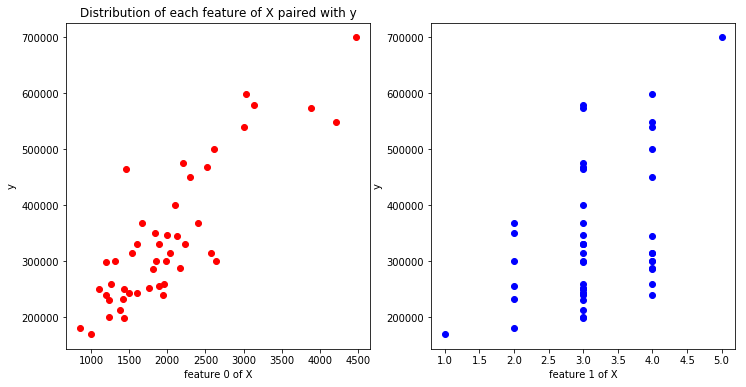

In [3]:
# plot data
def plot_data(X,y):
    plt.figure(figsize=(12,6))
    
    plt.subplot(1, 2, 1)
    plt.title('Distribution of each feature of X paired with y')
    plt.plot(X[:,0], y, 'ro')
    plt.xlabel('feature 0 of X')
    plt.ylabel('y')

    plt.subplot(1, 2, 2)
    plt.plot(X[:,1], y, 'bo')
    plt.xlabel('feature 1 of X')
    plt.ylabel('y')
    
  
plot_data(X,y)

In [4]:
#feature normalize
def feature_normalize(X):
    mean = np.mean(X,axis=0)
    stddev = np.std(X, axis=0)
  
    X_norm = (X-mean)/stddev
  
    return X_norm, mean, stddev


X, mean_X, stddev_X = feature_normalize(X)
y, mean_y, stddev_y = feature_normalize(y)

print(X)

[[  1.31415422e-01  -2.26093368e-01]
 [ -5.09640698e-01  -2.26093368e-01]
 [  5.07908699e-01  -2.26093368e-01]
 [ -7.43677059e-01  -1.55439190e+00]
 [  1.27107075e+00   1.10220517e+00]
 [ -1.99450507e-02   1.10220517e+00]
 [ -5.93588523e-01  -2.26093368e-01]
 [ -7.29685755e-01  -2.26093368e-01]
 [ -7.89466782e-01  -2.26093368e-01]
 [ -6.44465993e-01  -2.26093368e-01]
 [ -7.71822042e-02   1.10220517e+00]
 [ -8.65999486e-04  -2.26093368e-01]
 [ -1.40779041e-01  -2.26093368e-01]
 [  3.15099326e+00   2.43050370e+00]
 [ -9.31923697e-01  -2.26093368e-01]
 [  3.80715024e-01   1.10220517e+00]
 [ -8.65782986e-01  -1.55439190e+00]
 [ -9.72625673e-01  -2.26093368e-01]
 [  7.73743478e-01   1.10220517e+00]
 [  1.31050078e+00   1.10220517e+00]
 [ -2.97227261e-01  -2.26093368e-01]
 [ -1.43322915e-01  -1.55439190e+00]
 [ -5.04552951e-01  -2.26093368e-01]
 [ -4.91995958e-02   1.10220517e+00]
 [  2.40309445e+00  -2.26093368e-01]
 [ -1.14560907e+00  -2.26093368e-01]
 [ -6.90255715e-01  -2.26093368e-01]
 

In [5]:
#append vector of all 1 to X
vector_ones = np.ones((m,1)) 
X = np.append(vector_ones, X, axis = 1)

print(X.shape)

(47, 3)


In [6]:
#compute cost and gradient
def compute_cost_and_gradient(X,y, w):
    hX = X.dot(w)
    diff = hX - y   #diff or also y_hat
    J = 1.0/(2*m)*np.linalg.norm(diff)**2
    
    
    grad = 1.0/m*X.T.dot(diff)
    return J, grad
  


In [7]:
#Test function compute_cost_and_gradient with w = [-1,2, 3]
print("Now tesing cost with w = [-1,2, 3]\nThis value should be about 7.82")
cost, grad = compute_cost_and_gradient(X,y, np.array([-1,2,3]).reshape(3,1))
print("Cost computed by your function: {}".format(cost))


Now tesing cost with w = [-1,2, 3]
This value should be about 7.82
Cost computed by your function: 7.823044689123239


In [8]:
#Start training
iteration = 1500
lnr = 0.01


def train(iteration):
    global w
    for i in range(0,iteration):
        cost, grad = compute_cost_and_gradient(X,y, w)
        if(i % 50 == 0):
            print("Cost at iteration {} : {}".format(i, cost))
    
        #update w
        w = w - lnr*grad
    

train(iteration)
print("w after training: {}".format(w))
  

Cost at iteration 0 : 0.5
Cost at iteration 50 : 0.2517756317131743
Cost at iteration 100 : 0.1852095166088632
Cost at iteration 150 : 0.16171485631538346
Cost at iteration 200 : 0.15061173588265697
Cost at iteration 250 : 0.144301118524218
Cost at iteration 300 : 0.1404138432972991
Cost at iteration 350 : 0.13794870098105805
Cost at iteration 400 : 0.13637010283773102
Cost at iteration 450 : 0.13535599467793763
Cost at iteration 500 : 0.1347038483763095
Cost at iteration 550 : 0.13428433042785287
Cost at iteration 600 : 0.13401443049425968
Cost at iteration 650 : 0.13384078237468228
Cost at iteration 700 : 0.13372905946039
Cost at iteration 750 : 0.1336571781482812
Cost at iteration 800 : 0.13361093043726577
Cost at iteration 850 : 0.13358117511539044
Cost at iteration 900 : 0.1335620308319675
Cost at iteration 950 : 0.1335497135865463
Cost at iteration 1000 : 0.13354178879075576
Cost at iteration 1050 : 0.13353669005427451
Cost at iteration 1100 : 0.13353340957684312
Cost at iteratio

In [9]:
# perform some prediction on training set

def predict(x, w):
    '''This function compute y_predict = cross product of x and w'''
    return x.dot(w) 


# choose 5 random training examples
indices = np.random.permutation(m)[:5]
for idx in indices:
    x = X[idx, :]
    y_predict = float(predict(x, w))
    y_true = float(y[idx,:])
    print("Your prediction on training examples %2d: %4.03f. \tActual label is: %.03f"%(idx, y_predict, y_true))

Your prediction on training examples  6: -0.513. 	Actual label is: -0.206
Your prediction on training examples 41: 0.279. 	Actual label is: -0.085
Your prediction on training examples  5: -0.076. 	Actual label is: -0.328
Your prediction on training examples 31: -0.974. 	Actual label is: -1.378
Your prediction on training examples 11: 0.011. 	Actual label is: 0.053
